### Auteur : Monya M. - Nejib B. 

In [1]:
#importation des librairies pour la création des graphiques
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Import data frame + affichage des informations pertinentes
df = pd.read_csv('data_dataviz.csv', sep = ';')

display(df.shape)
display(df.isna().sum())
display(df.head())
#display(df.columns)

(20038, 100)

duration                                                                                   2
age                                                                                        2
gender                                                                                     2
country                                                                                    2
diploma                                                                                  469
                                                                                       ...  
use_computer_vision_methods_image_segmentation_methods                                 18035
Use_computer_vision_methods_object_detection_methods                                   17959
use_computer_vision_methods_image_classification_and_other_general_purpose_networks    16526
use_computer_vision_methods_generative_networks                                        18946
Q18_Part_6 à supprimer                                                

,duration,age,gender,country,diploma,position,years_of_programming,programming_python,programming_r,programming_sql,...,use_ml_algorithms_recurrent_neural_networks,use_ml_algorithms_transformer_networks,use_ml_algorithms_none,use_ml_algorithms_other,use_computer_vision_methods_general_purpose_image/video_tools,use_computer_vision_methods_image_segmentation_methods,Use_computer_vision_methods_object_detection_methods,use_computer_vision_methods_image_classification_and_other_general_purpose_networks,use_computer_vision_methods_generative_networks,Q18_Part_6 à supprimer
0,1838.0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,Recurrent Neural Networks,NaN,NaN,NaN,NaN,NaN,NaN,Image classification and other general purpose...,NaN,NaN
1,289287.0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN,NaN,"Image segmentation methods (U-Net, Mask R-CNN,...",NaN,Image classification and other general purpose...,NaN,NaN
2,860.0,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,507.0,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78.0,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Contexte

**Cible :** les personnes qui sont intéressées par les métiers de la data et qui veulent savoir quelles sont les compétences attendues dans ce domaine d’activité.

**Ce que l’on veut montrer :**
1. Visualisation des jobs de la data
2. Visualisation des diplômes des personnes qui travaillent dans la data
3. Visualisation de l’âge des personnes qui travaillent dans la data
4. Visualisation de la répartition par genre des personnes qui travaillent dans la data
5. Visualisation des langages de programmation utilisés dans la data 
6. Visualisation du/des langages de programmation(s) recommandé(s) 
7. Autre(s)
  
**Comment :** à l’aide de graphiques (matplotlib, seaborn, etc.) mettre en valeur la répartition des données à notre disposition. 

Réaliser une courte analyse des données :
* Qu’est-ce que l’on voit/constate ?
* Qu’est-ce que l’on peut en déduire ?


# Dataviz

## Identification et classification des répondants :

* Pays de résidence des répondants

* Ages des répondants

* Genres des répondants

* Diplômes des répondants

* Postes actuels des répondants

## Pour aller dans le détail :

* Top 10 pays qui ont répondu à l'enquête

* Répartition des langages de programmations recommandés

* Top 3 des langages de programmation

* Répartition des diplômes du top 10 pays

* Répartition des postes du top 10 pays

## Focus sur 3 métiers de la data : Data Analyst, Data Engineer, Data Scientist 

* Répartition des diplômes en fonction des 3 métiers cible 

* Répartition des 3 langages de programmation en fonction des 3 métiers cible

* Répartition des 3 métiers cible vs top 10 pays 

* Répartition des 3 métiers cible en France

* Répartition des 3 métiers cible en fonction du Genre  

* Répartition des 3 métiers cible en France en fonction du Genre 




In [3]:
#Palette de couleur et autres personnalisations
custom_layer = sns.color_palette('magma_r', 12)

custom_plot = sns.color_palette('Paired',12)

#df_country ne contient que la colonne pays (pour geopandas)
#Maj nom des pays
updated_country = ({'country':{'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                    'Iran, Islamic Republic of...':'Iran'}})

df = df.replace(updated_country)

#Suppression des lignes avec Other 
df.drop(df[df['country'] == 'Other'].index, inplace = True)
#display(df.country.unique())#vérification

df['participation_sondage'] = df['country']
df_country = df[['country','participation_sondage']].copy()
#display(df_country.head()) #vérification


#df2 ne contient que les colonnes nécessaires à la création de nos différents graphiques : Pays, Age, Genre, Position, Diplôme, Langage de programmation recommandé 
selected_columns = df[['age', 'gender', 'country', 'diploma', 'position','recommend_programming_to_learn_first']]
df2 = selected_columns.copy()
#df2.head() #vérification

In [4]:
#Fonction création de countplot

def diagramme_barre(variable, palette_couleurs, titre_graphique, titre_abscisse):
    sns.countplot(x=variable, palette=palette_couleurs)
    plt.xticks(rotation=90)
    plt.title(titre_graphique, fontweight='bold')
    plt.xlabel(titre_abscisse, weight = 'bold')
    plt.ylabel('Effectifs', weight = 'bold')
    plt.show();

    

def diagramme_barre_ascending(variable, palette_couleurs, titre_graphique, titre_abscisse):
    sns.countplot(x=variable, palette=palette_couleurs, order=variable.value_counts(ascending=True).index)
    plt.xticks(rotation=90)
    plt.title(titre_graphique, fontweight='bold')
    plt.xlabel(titre_abscisse, weight = 'bold')
    plt.ylabel('Effectifs', weight = 'bold')
    plt.show();

def diagramme_barre_descending(variable, palette_couleurs, titre_graphique, titre_abscisse):
    sns.countplot(x=variable, palette=palette_couleurs, order=variable.value_counts(ascending=False).index)
    plt.xticks(rotation=90)
    plt.title(titre_graphique, fontweight='bold')
    plt.xlabel(titre_abscisse, weight = 'bold')
    plt.ylabel('Effectifs', weight = 'bold')
    plt.show();



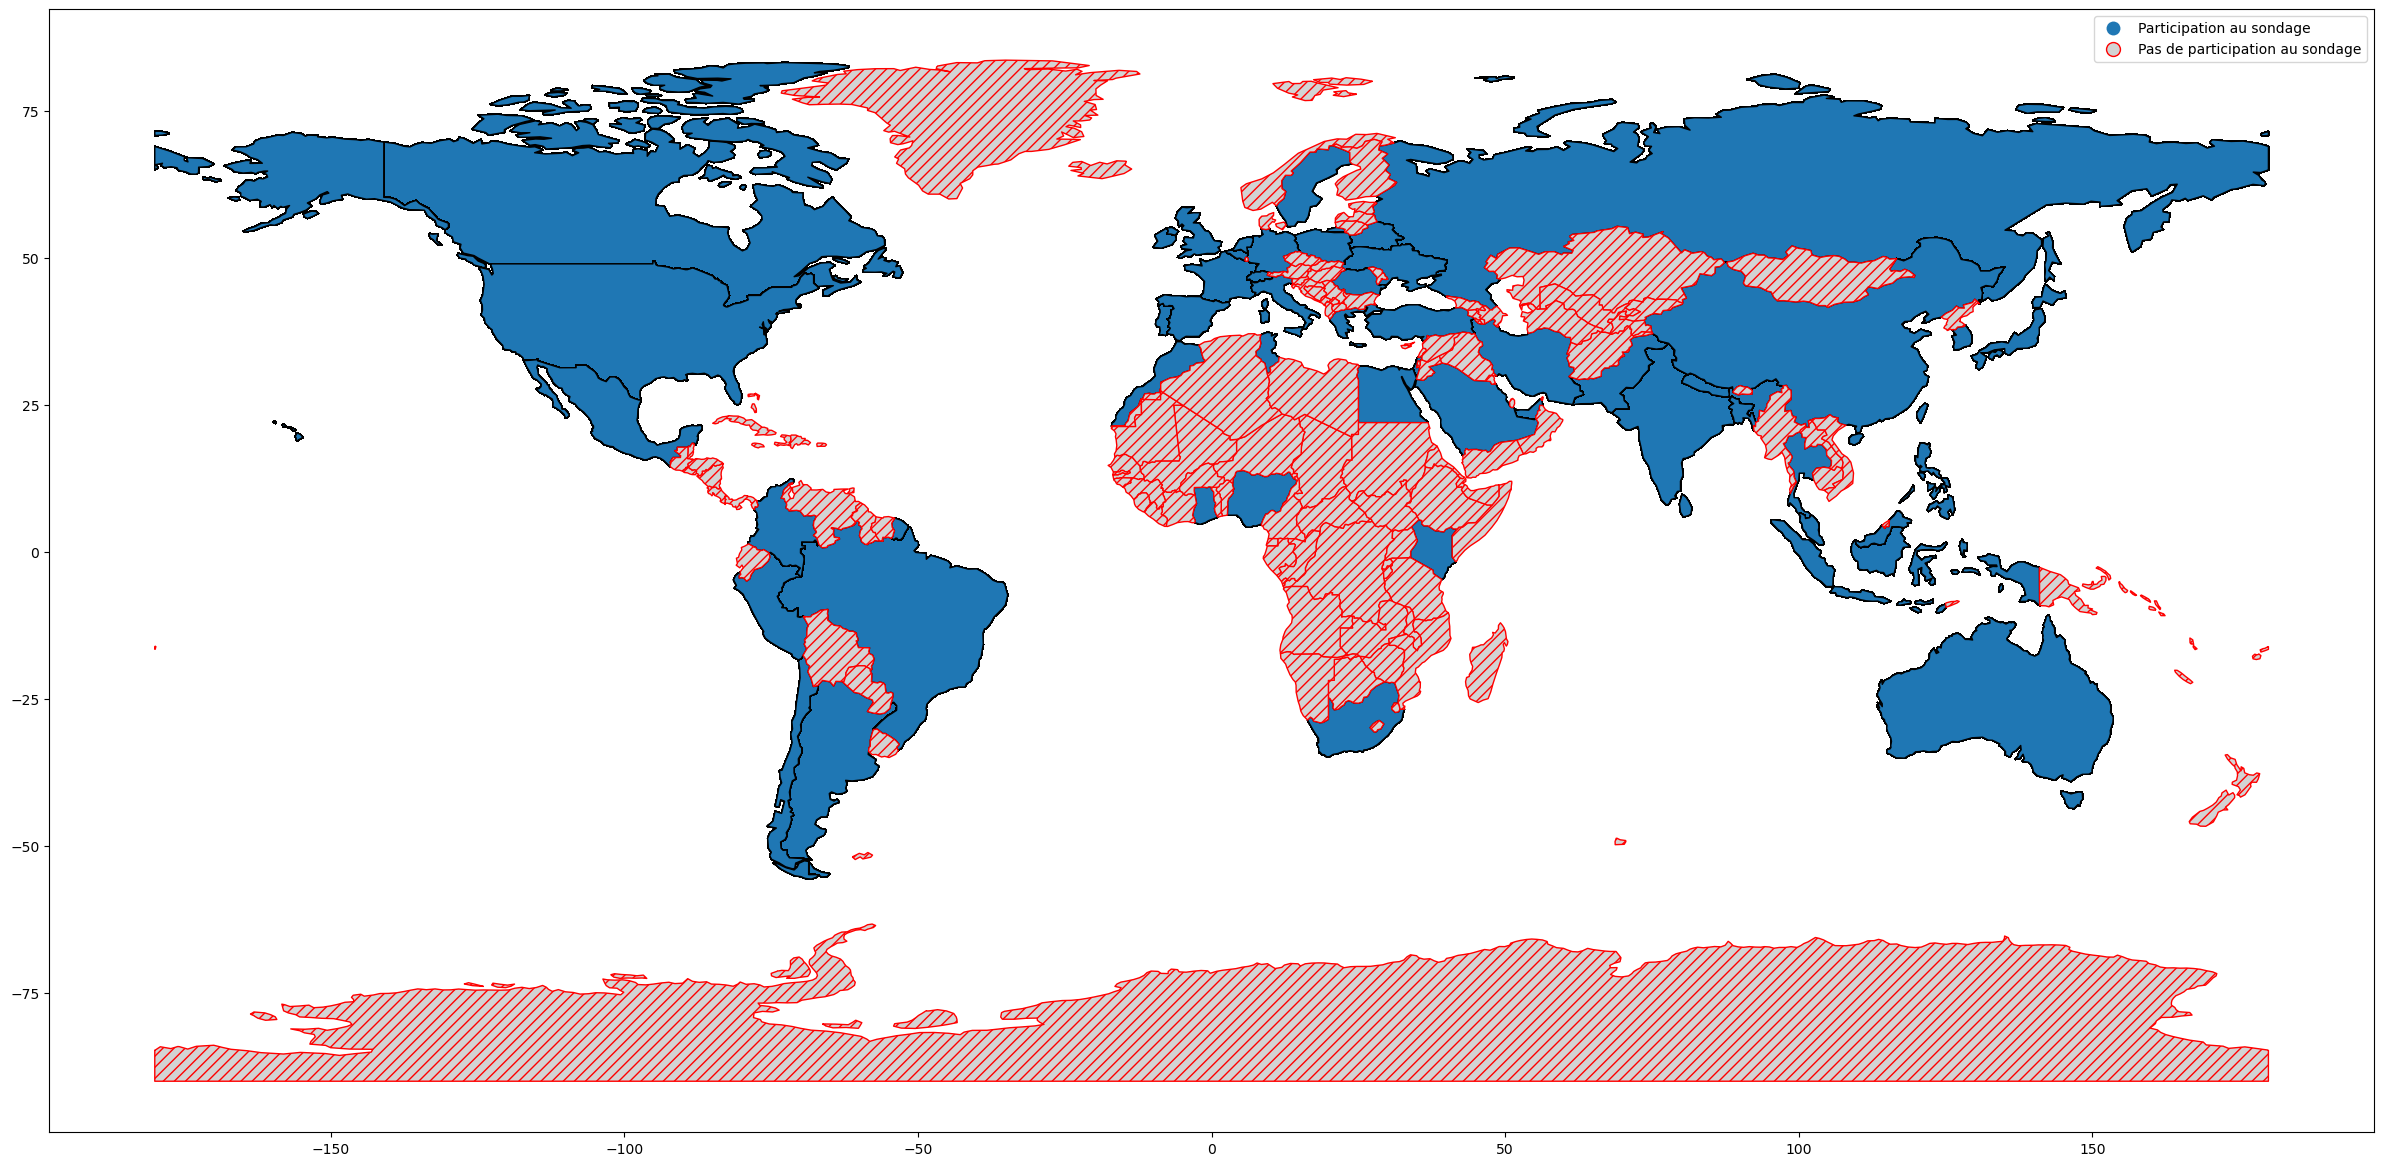

In [5]:
'''==> Identification et classification des répondants :'''

#Pays de résidence des répondants

#Mise à jour des données de la colonne participation_sondage
updated_value = ({'participation_sondage' :{
    'Colombia':'Participation au sondage', 'United States of America':'Participation au sondage',
    'Argentina':'Participation au sondage', 'Japan':'Participation au sondage','India':'Participation au sondage',
    'Brazil':'Participation au sondage', 'China':'Participation au sondage', 'Germany':'Participation au sondage',
    'Indonesia':'Participation au sondage', 'Canada':'Participation au sondage','Switzerland':'Participation au sondage',  
    'Singapore':'Participation au sondage', 'Russia':'Participation au sondage', 'South Africa':'Participation au sondage',
    'Egypt':'Participation au sondage', 'Netherlands':'Participation au sondage', 'Pakistan':'Participation au sondage',
    'Nepal':'Participation au sondage', 'South Korea':'Participation au sondage','Poland':'Participation au sondage',
    'Belarus':'Participation au sondage', 'Tunisia':'Participation au sondage', 'Ukraine':'Participation au sondage',
    'Belgium':'Participation au sondage','Saudi Arabia':'Participation au sondage', 'Taiwan':'Participation au sondage',
    'Nigeria':'Participation au sondage', 'Italy':'Participation au sondage', 'Spain':'Participation au sondage','United Arab Emirates':'Participation au sondage',
    'Mexico':'Participation au sondage', 'Viet Nam':'Participation au sondage', 'Thailand':'Participation au sondage',
    'United Kingdom':'Participation au sondage', 'France':'Participation au sondage','Ghana':'Participation au sondage',
    'Ireland':'Participation au sondage', 'Philippines':'Participation au sondage', 'Morocco':'Participation au sondage',
    'Turkey':'Participation au sondage','Iran':'Participation au sondage', 'Peru':'Participation au sondage', 'Romania':'Participation au sondage',
    'Republic of Korea':'Participation au sondage', 'Australia':'Participation au sondage', 'Chile':'Participation au sondage',
    'Kenya':'Participation au sondage', 'Sweden':'Participation au sondage','Bangladesh':'Participation au sondage', 'Greece':'Participation au sondage',
    'Malaysia':'Participation au sondage', 'Portugal':'Participation au sondage', 'Israel':'Participation au sondage','Sri Lanka':'Participation au sondage',
    'nan': 'Pas de participation au sondage'}})

df_country = df_country.replace(updated_value)
#df_country.head() #vérification

#Chargement données GIS
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#Renommer country en name pour la fusion avec dataframe world
df_country = df_country.rename(columns ={'country' : 'name'})

#Création d'un dataframe world2 (fusion de df_country avec world)
world2 = world.merge(right = df_country, on = ['name'], how = 'left')

#world2.head() #vérification

#Carte du monde en bleu les pays répondant, en gris haché rouge les non répondants
world2.plot(
    column="participation_sondage",edgecolor= "black",
    legend=True,
    figsize=(30, 20),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Pas de participation au sondage",
    },
);





Au travers de cette représentation cartagrophique, nous souhaitons répondre à la question : "Quels sont les pays qui ont participé à l'enquête de Kaggle ?"

On remarque qu'en-dehors d'un grand nombre de pays du continent Africain, les autres continents sont bien représentés dans l'enquête.

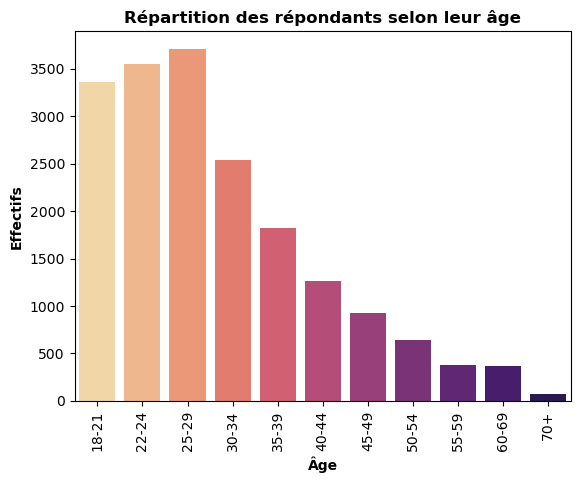

In [6]:
#Ages des répondants

#Tri par ordre croissant
df2 = df2.sort_values('age')

#Création d'un graphique qui donne une représensation des âges des répondants au sondage
diagramme_barre(df2.age, custom_layer, 'Répartition des répondants selon leur âge', 'Âge')

Au travers de ce graphique en barres, nous souhaitons répondre à la question : "Quels âges ont les répondants à l'enquête de Kaggle ?"

On constate qu'une grande majorité des répondants à entre **18 et 40 ans**. Le secteur de la data est relativement jeune (moins de 20 ans) et de nombreuses opportunités sont à saisir. De plus, les métiers de ce secteur font parti des métiers les plus porteurs / recherchés dans les différents "top d'emplois" de ces dernières années.

**Ce qui peut expliquer la forte représentation des 18/40 ans dans le sondage.**

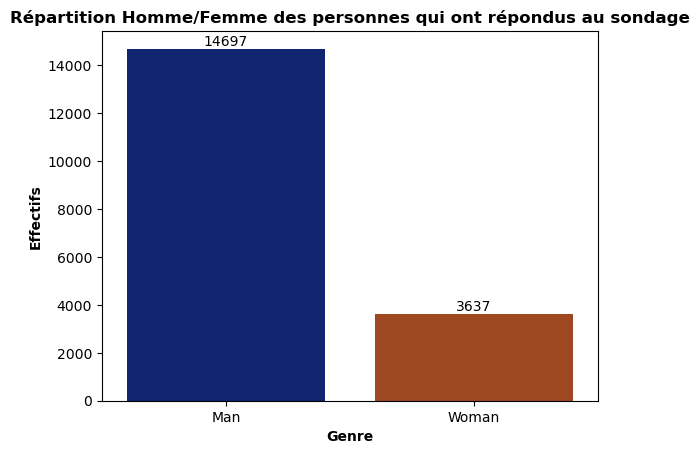

In [7]:
#Genres des répondants

#Tri par ordre alphabétique
df = df.sort_values('gender')

#Dictionnaire pour remplacer les valeurs autres que Homme et Femme
other = {'gender':{'Nonbinary': 'Other', 
                  'Prefer not to say' : 'Other', 
                  'Prefer to self-describe': 'Other'}}

#Création d'un nouveau dataframe
df_gender = df.copy()

#Mise à jour des valeurs autres qu'Homme et Femme
df_gender = df_gender.replace(other)

#Suppression des lignes Other (369)
df_gender.drop(df_gender[df_gender['gender'] == 'Other'].index, inplace = True)

#Création d'un graphique qui compare le nombre d'homme et de Femme
ax = sns.countplot(x = df_gender.gender, palette = 'dark')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Répartition Homme/Femme des personnes qui ont répondus au sondage', weight = 'bold')
plt.ylabel('Effectifs', weight = 'bold')
plt.xlabel('Genre',weight = 'bold');

Au travers de ce graphique en barres, nous souhaitons répondre à la question : "Quelle est la répartition Homme/Femme des personnes qui ont répondu au sondage ?"

Pour la clarté du graphique nous avons décidé de ne garder que les réponses : 'Man' ou 'Woman'. On constate que les Hommes représentent **80%** des répondants. 

**Cela est en adéquation avec les tendances actuelles dans le secteur de l'informatique avec une prédominance des hommes.**

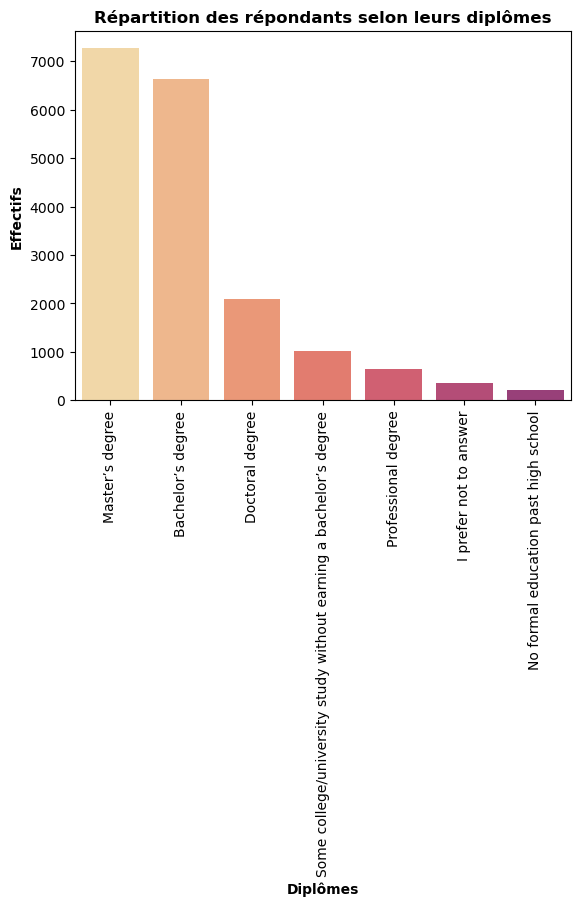

In [8]:
#Diplômes des répondants

#Création d'un graphique qui donne une représensation des diplômes des répondants au sondage
diagramme_barre_descending(df2.diploma, custom_layer, 'Répartition des répondants selon leurs diplômes', 'Diplômes')

Au travers de ce graphique en barres, nous souhaitons répondre à la question : "Quelle est la répartition du niveau d'études des personnes qui ont répondu au sondage ?"

On constate que les diplômes : **Licence**, **Master** et **Doctorat** sont les plus représentés. Cela induit que les personnes qui travaillent dans la data ont au moins à **minima un niveau licence**. 

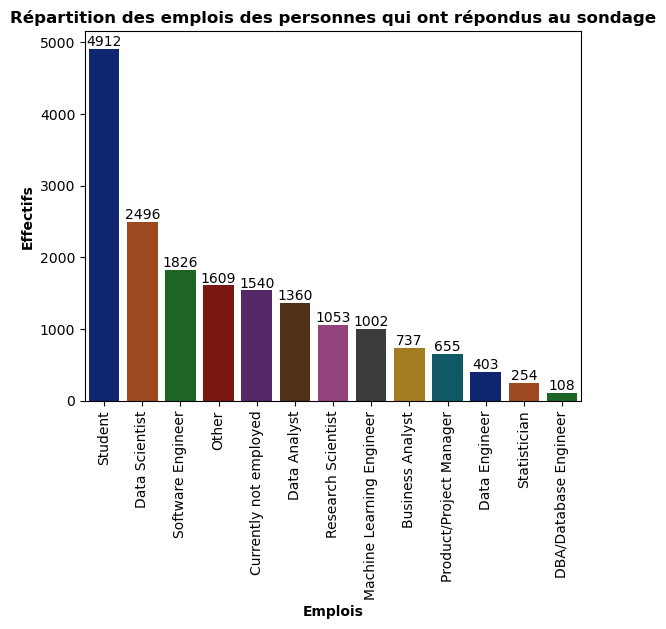

In [9]:
#Postes actuels des répondants

#Tri par ordre croissant
#df2 = df2.position.value_counts(ascending=True).index

#Création d'un graphique qui donne une représensation des âges des répondants au sondage
#diagramme_barre_ascending(df2.position, custom_plot, 'Répartition des répondants selon leur emploi actuel', 'Emploi actuel')
ax = sns.countplot(x = df2.position, palette = 'dark', order=df2.position.value_counts(ascending=False).index)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Répartition des emplois des personnes qui ont répondus au sondage', weight = 'bold')
plt.ylabel('Effectifs', weight = 'bold')
plt.xlabel('Emplois',weight = 'bold')
plt.xticks(rotation = 90);

Au travers de ce graphique en barres, nous souhaitons répondre à la question : "Quelle est la répartition des emplois des personnes qui ont répondu au sondage ?"

On constate que les **Etudiants** représentent **27%** des répondants, suivi par les **Data Scientists** à **14%**. Les **Data Analysts** et les **Data Engineers** représentent respictivement **8%** et **2%** des répondants. 

La forte représentation des **Etudiants et Data Scientists** (41%) peut s'expliquer pour les Data Scientists qu'il s'agit **du métier le plus en vogue** ces dernières années et pour les étudiants par le fait que les métiers de la Data, sont particulièrement recherchés aujourd'hui.

**Néanmoins, il est bon de rappeler que le site Kaggle qui est à l'origine de l'enquête, propose également des formations en data science. Ce qui peut également expliquer le fait que presque *un tiers* des répondants est actuellement étudiant.**

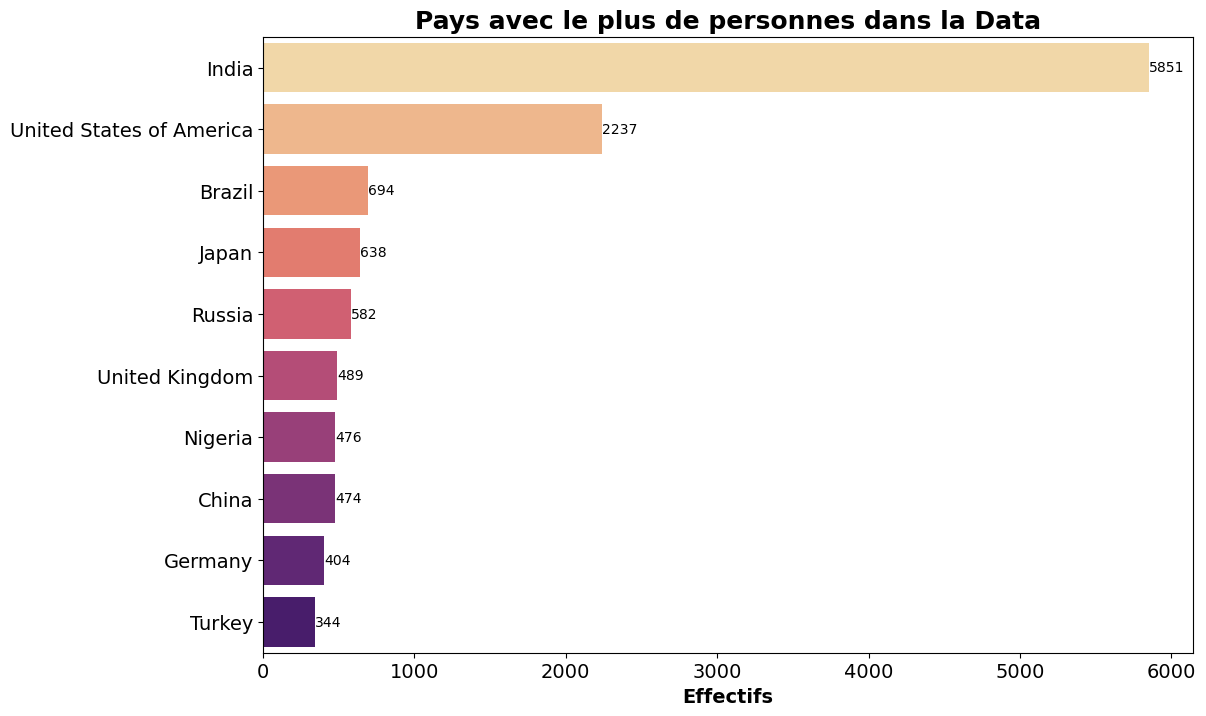

In [10]:
'''==> Pour aller dans le détail :'''
#Top 10 pays qui ont répondu à l'enquête
countries_with_most_developers = df2.country.value_counts().nlargest(10).sort_values(ascending=False)
plt.figure(figsize=(12,8))
countries_with_most_developers.plot(kind='barh')
ax = sns.barplot(x = countries_with_most_developers.values ,y = countries_with_most_developers.index, palette = custom_layer )
ax.bar_label(ax.containers[0], label_type='edge')

#Création des légendes
plt.title('Pays avec le plus de personnes dans la Data',fontsize=18,weight='bold')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Effectifs',fontsize=14, weight = 'bold')
plt.style.use('ggplot');


Au travers de ce graphique en barres, nous souhaitons répondre à la question : "Quels sont les 10 pays qui ont le plus répondu au sondage ?"

On constate que deux pays se détachent nettement en termes de nombre de participants à l'enquête : **l'Inde (48%)**  et **les Etats Unis d'Amérique (18%)**. 

Les 8 pays restant représentent entre **6 et4%** des répondants.

Néanmoins, nous ne disposons pas de suffisant d'information pour expliquer une telle représentation de l'Inde et des Etats Unis. Bien que l'explication démographique semble pertinente, elle est rapidement invalidée par le fait que la Chine ne représente que **4%** des répondants, alors qu'elle dispose d'une population totale supérieure à celle de l'Inde. 

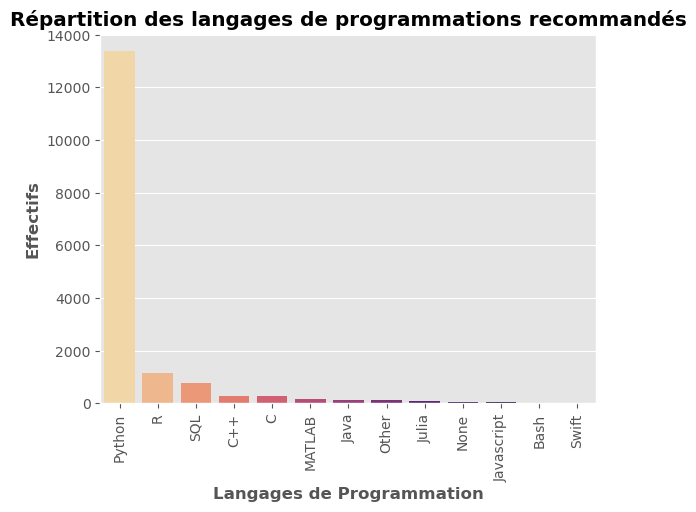

In [11]:
#Répartition des langages de programmations recommandés

diagramme_barre_descending(df.recommend_programming_to_learn_first, custom_layer, 'Répartition des langages de programmations recommandés', 'Langages de Programmation')

Au travers de ce graphique en barres, nous souhaitons répondre à la question : "Quels sont les langages de programmation recommandés ?"

On constate qu'une majorité des répondants préconisent l'utilisation de **Python**, suivent ensuite **R** et **SQL**.

**Il s'agit des 3 langages de programmation les plus utilisés dans les métiers de la Data Science.**


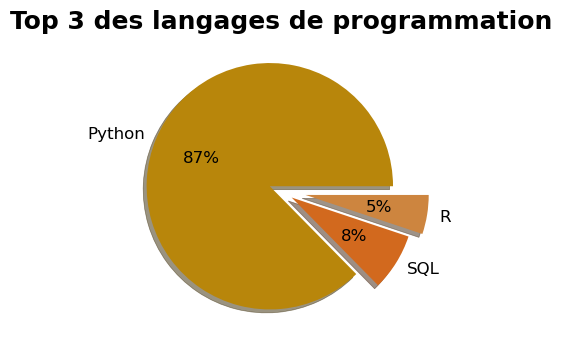

In [22]:
#Top 3 des langages de programmation

rec_lp = df.recommend_programming_to_learn_first.value_counts().nlargest(3).sort_values(ascending = False)
#display(rec_lp.head())


plt.figure(figsize=(4,4))
plt.rcParams['font.size'] = 12.0
#plt.rcParams["font.weight"] = "bold"
expl = [0.1,0.1,0.2]
plt.pie(x=rec_lp, labels = ['Python', 'SQL', 'R'],explode = expl,colors =['darkgoldenrod', 'chocolate', 'peru'], autopct = lambda x: str(round(x)) + '%',shadow = True)
plt.title('Top 3 des langages de programmation', fontsize=18,weight='bold')
plt.show();

Ce camembert nous permet de nous faire une idée plus précise du poids de **Python** dans les langages de programmation recommandés pour les métiers de la Data Science.

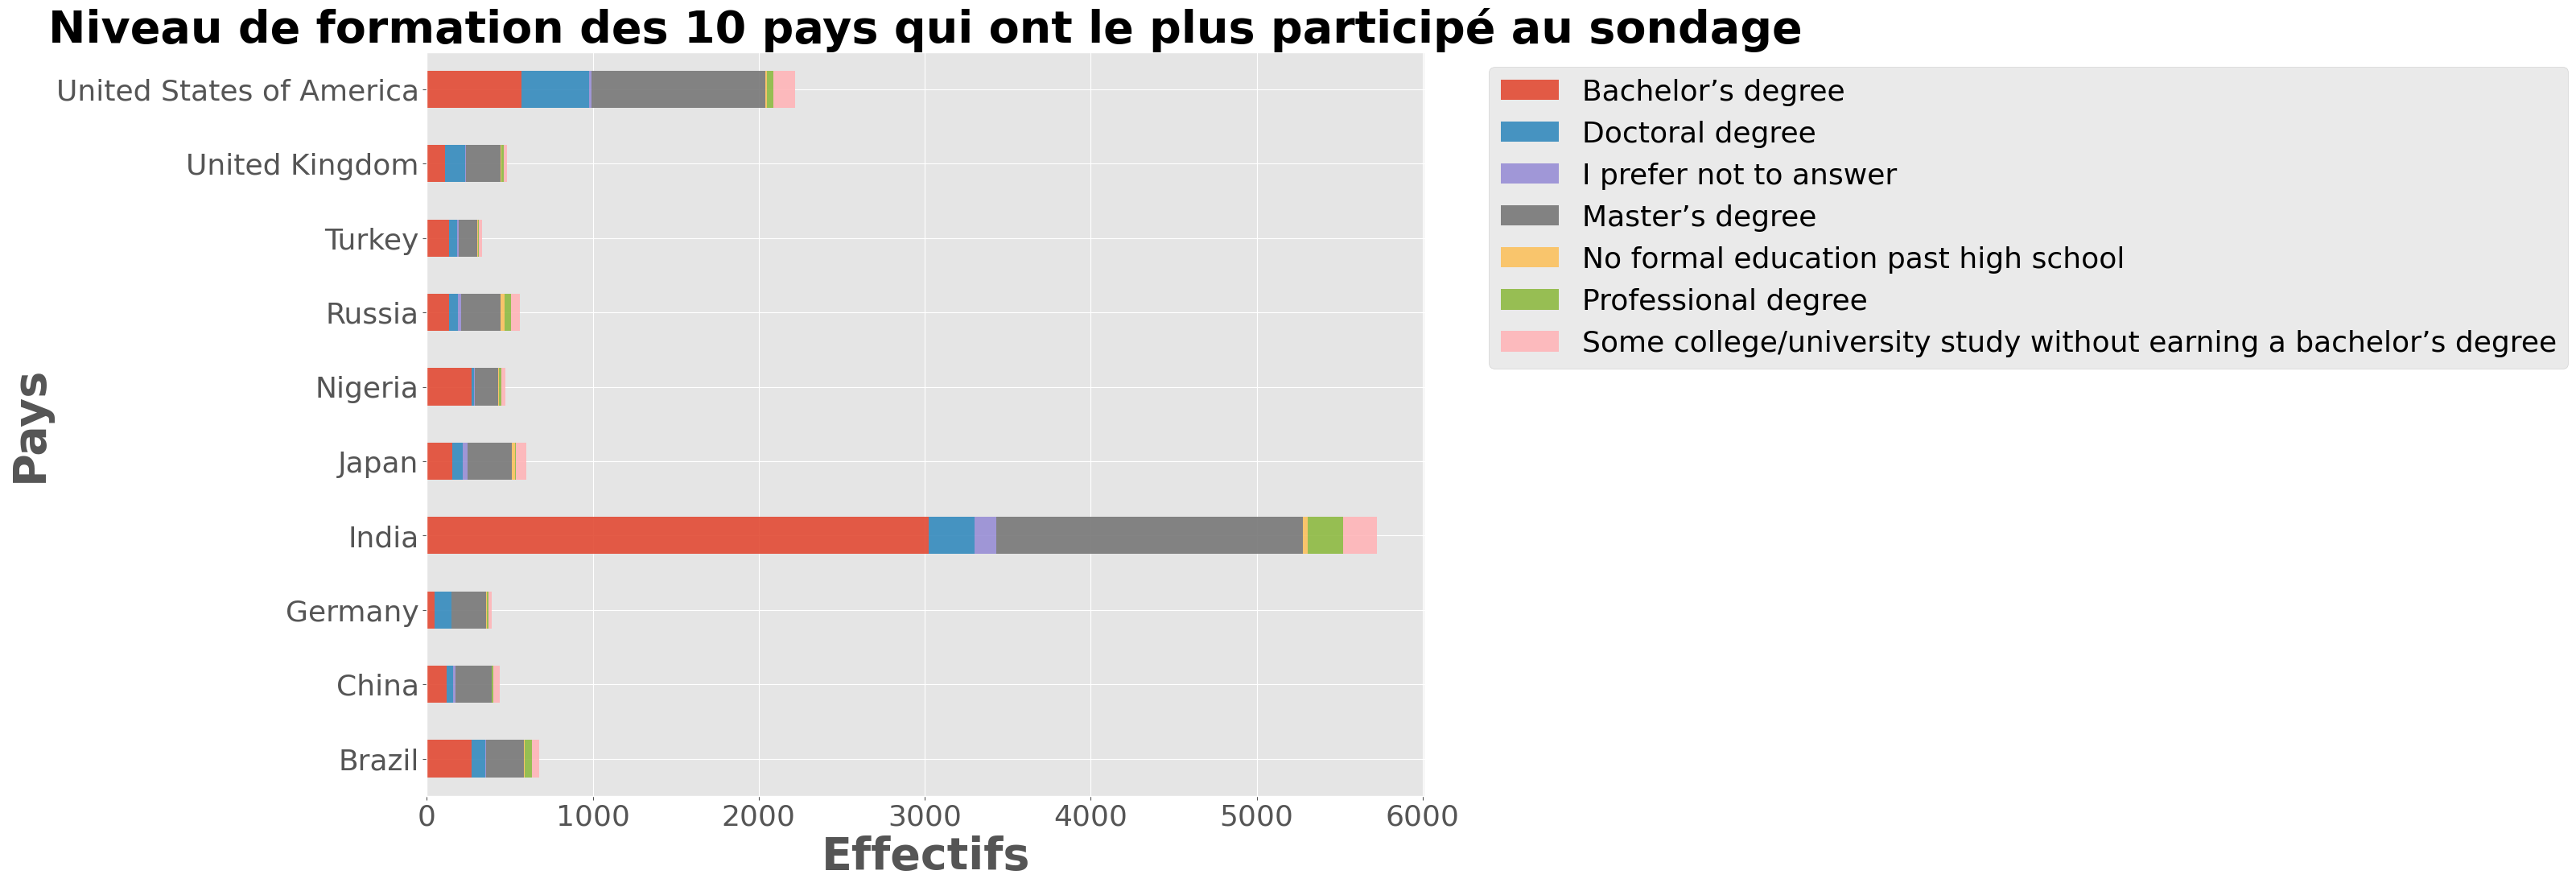

In [13]:
#Répartition des diplômes du top 10 pays
top_country = df[df['country'].isin(['India','United States of America','Brazil','Japan','Russia', 
                              'United Kingdom', 'Nigeria', 'China','Germany', 'Turkey'])]
table = top_country.groupby(['diploma', 'country']).size().reset_index().pivot(columns='diploma', index='country', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(16,12),alpha=0.9)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
#Création des légendes
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 26})
        plt.xlabel('Effectifs',fontsize=40, weight = 'bold')
        plt.ylabel('Pays',fontsize=40, weight = 'bold')
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.title('Niveau de formation des 10 pays qui ont le plus participé au sondage',fontsize=40,weight='bold');

Au travers de ce graphique en barres, nous présentons de façon plus détaillée la répartitions des diplômes au sein des 10 pays qui ont le plus répondu au sondage.

Sans surprise, on vérifie bien que les diplômes les plus représentés sont bien : la **Licence**, le **Master** et le **Doctorat**.

**On peut en déduire, qu'il est recommandé d'avoir au moins un niveau Licence pour travailler dans la Data Science.**

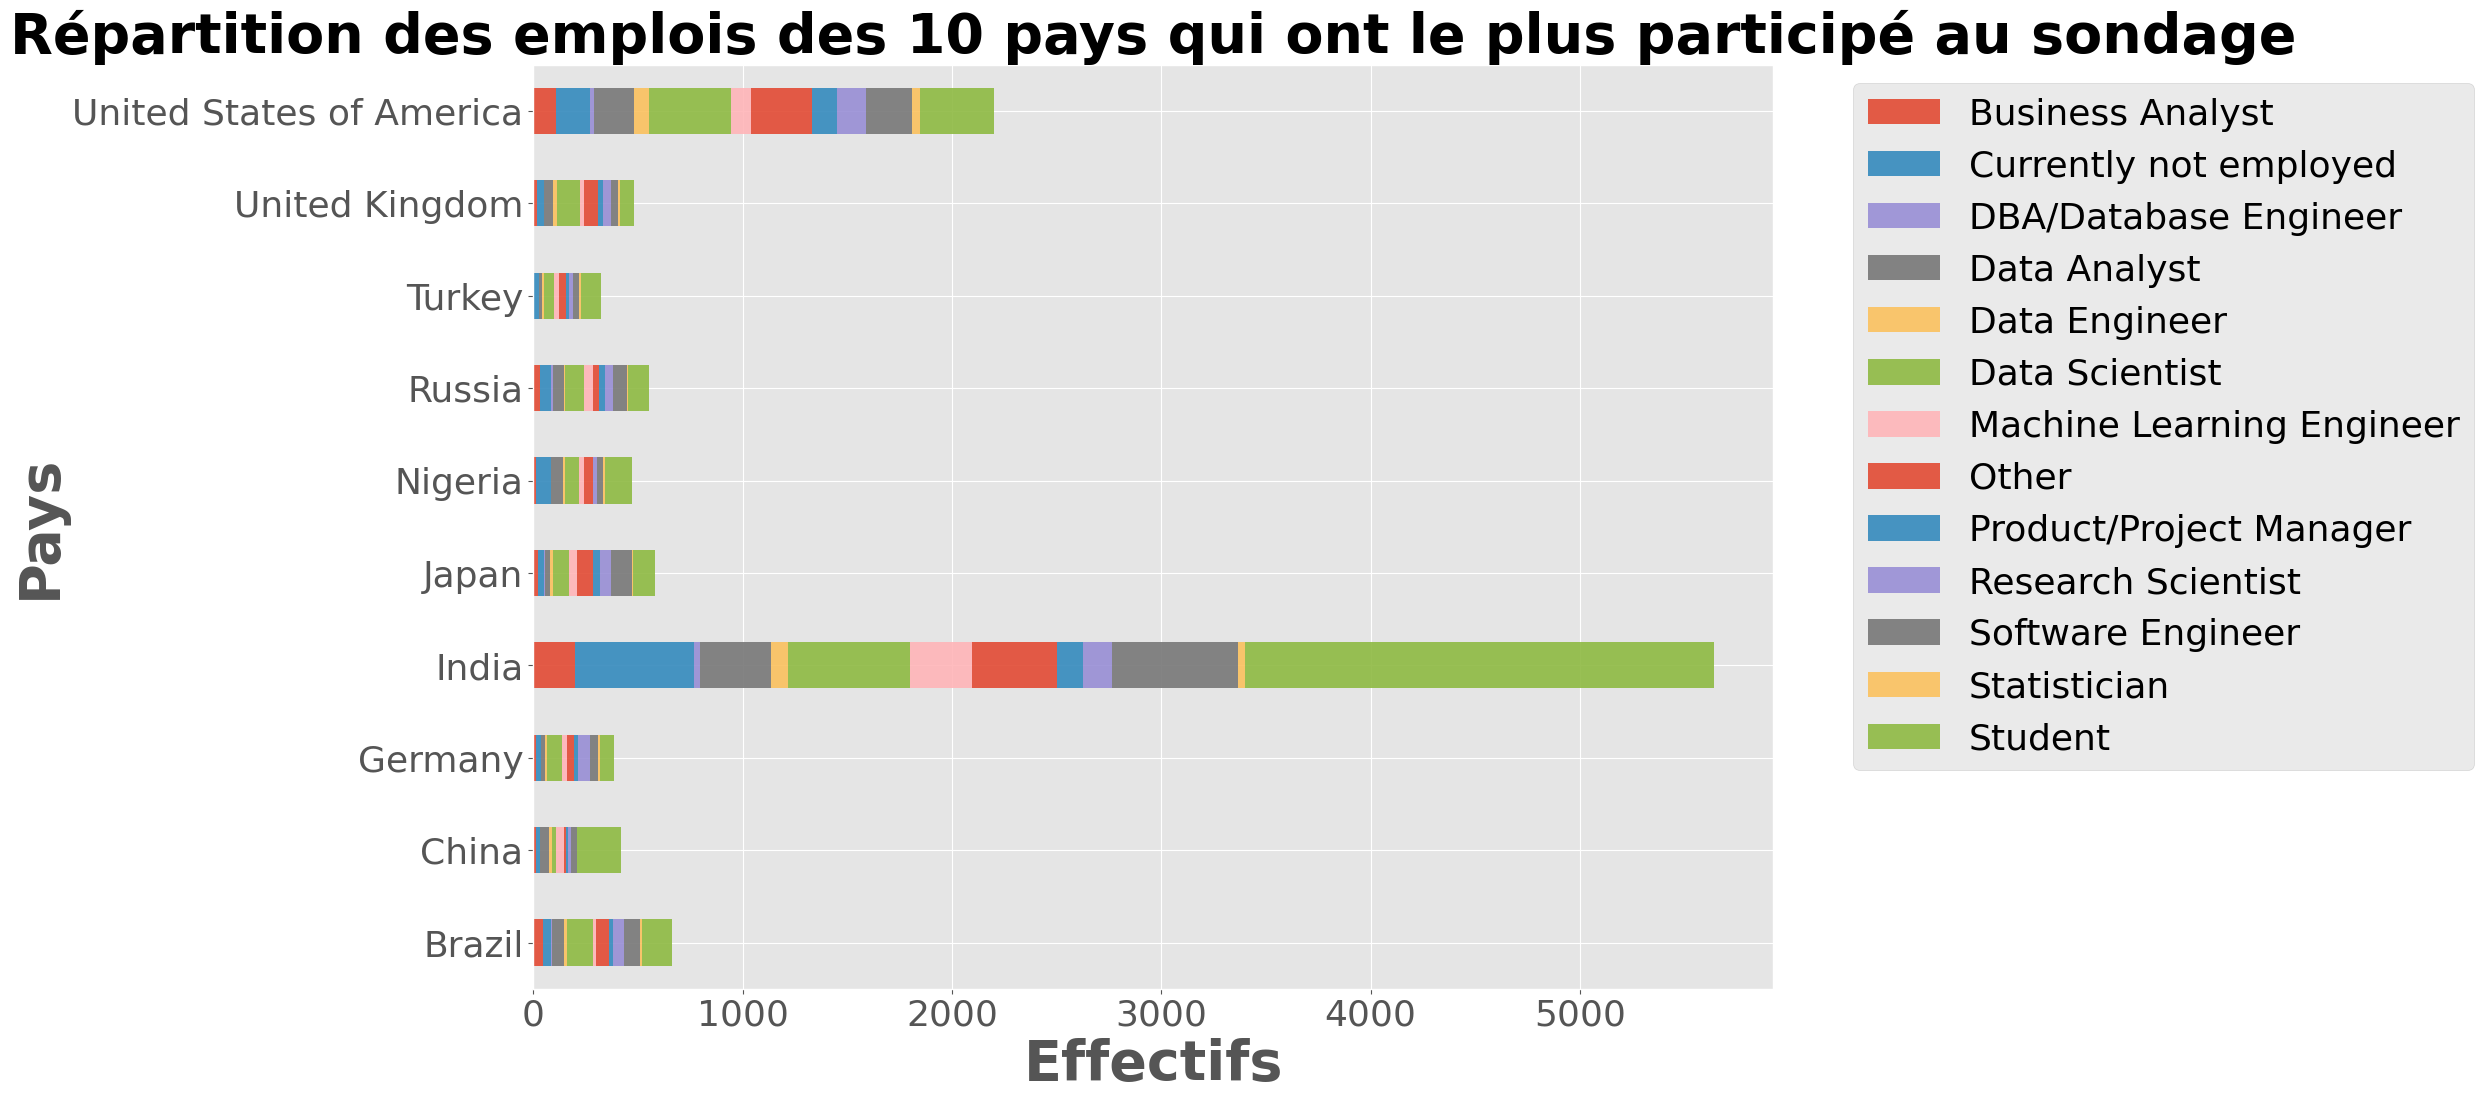

In [14]:
#Répartition des postes du top 10 pays

top_country = df[df['country'].isin(['India','United States of America','Brazil','Japan','Russia', 
                              'United Kingdom', 'Nigeria', 'China','Germany', 'Turkey'])]
table = top_country.groupby(['position', 'country']).size().reset_index().pivot(columns='position', index='country', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(16,12),alpha=0.9)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
#Création des légendes
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 26})
        plt.xlabel('Effectifs',fontsize=40, weight = 'bold')
        plt.ylabel('Pays',fontsize=40, weight = 'bold')
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.title('Répartition des emplois des 10 pays qui ont le plus participé au sondage',fontsize=40,weight='bold');


Au travers de ce graphique en barres, nous détaillons la répartition des emplois au sein des 10 pays qui ont le plus répondu au sondage. 

On constate que la part d'étudiant vient en partie de l'Inde (qui représente à elle seule, 48% des réponses des 10 principaux pays).

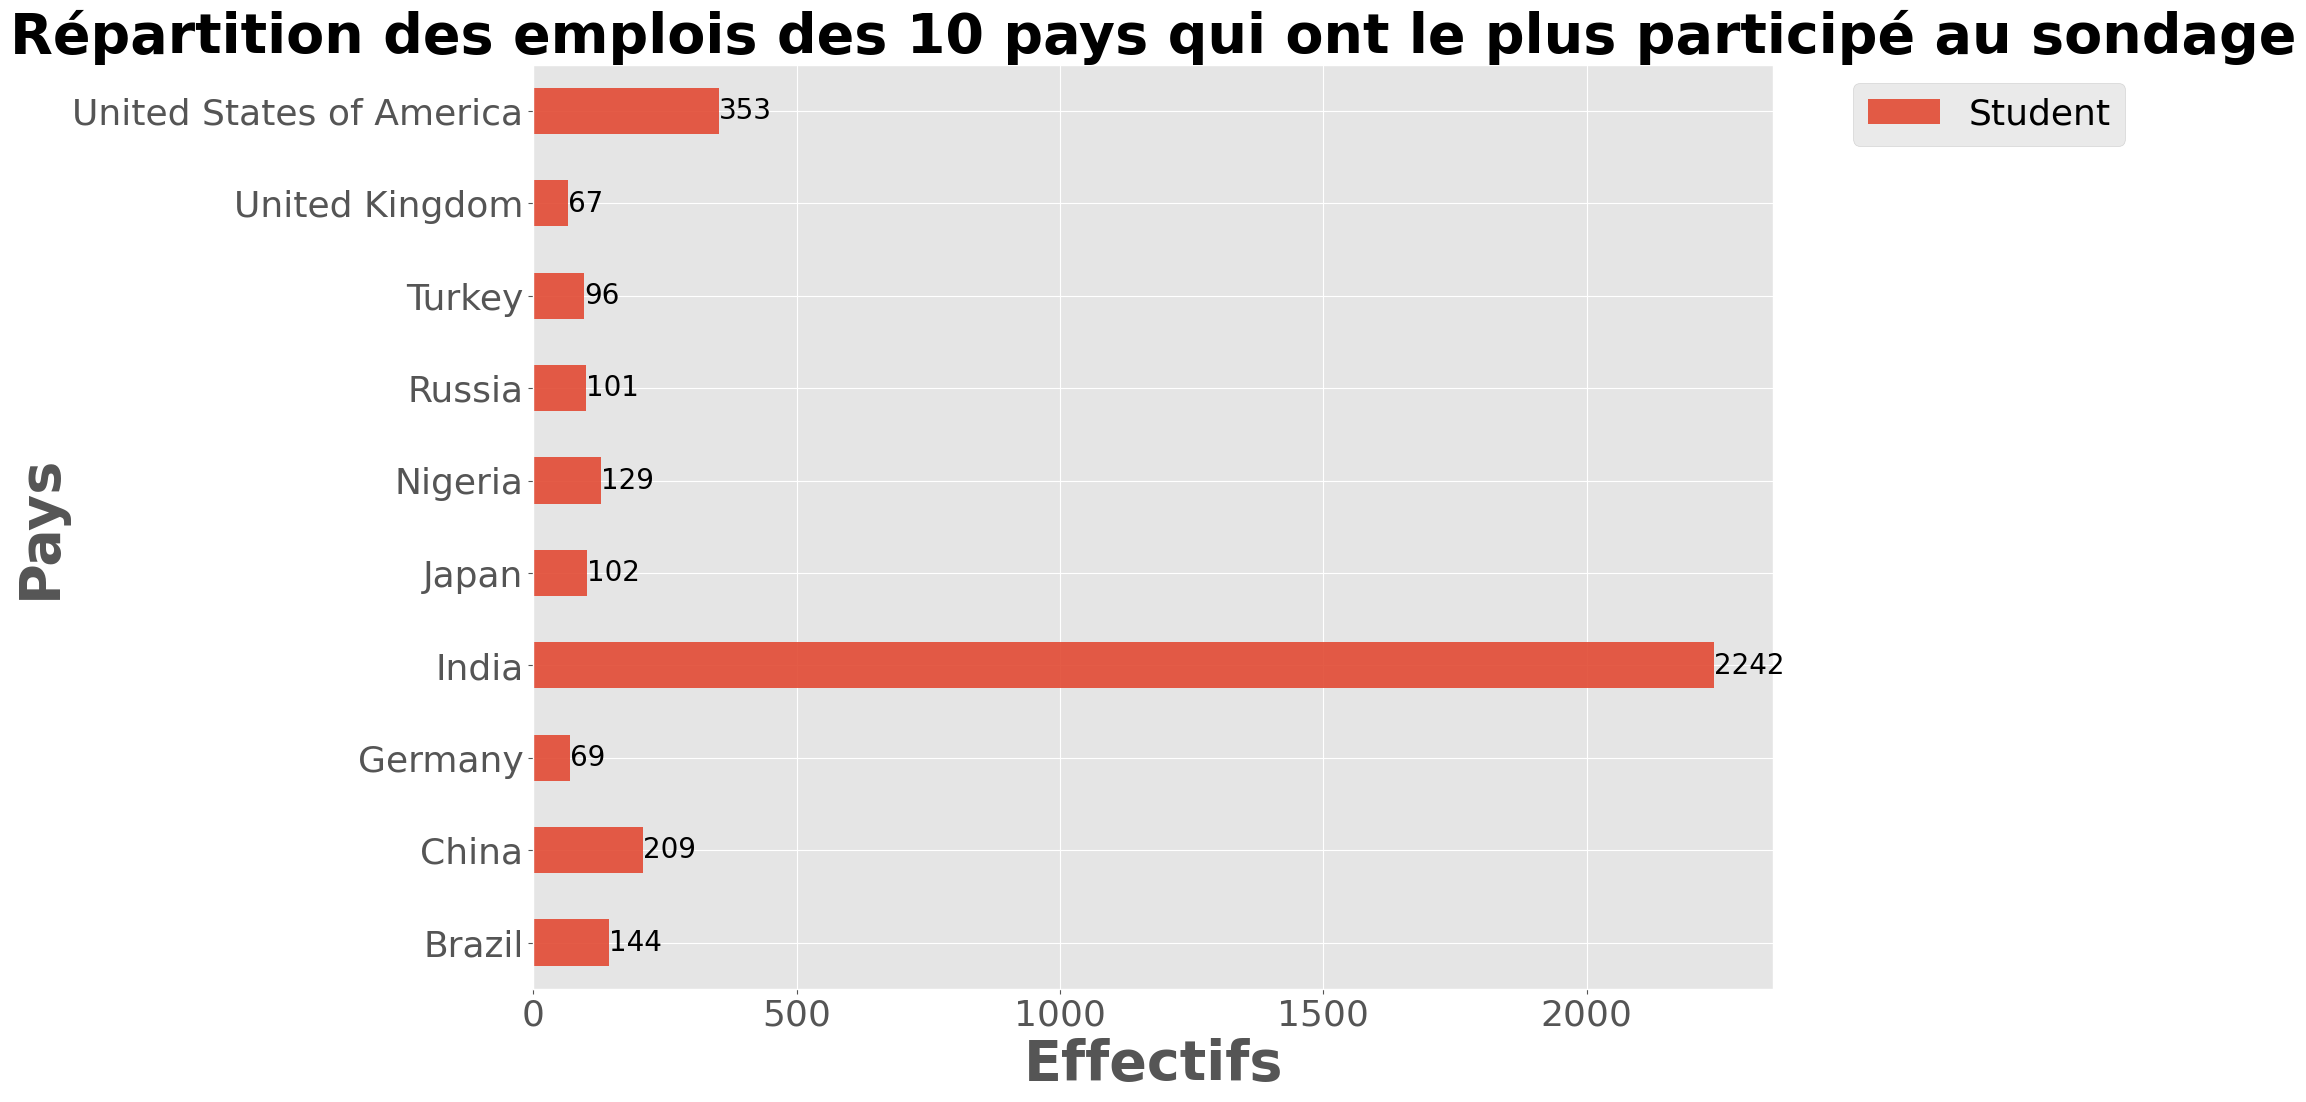

In [15]:
#Répartition des étudiant dans le top 10 pays

top_country = df[df['country'].isin(['India','United States of America','Brazil','Japan','Russia', 
                              'United Kingdom', 'Nigeria', 'China','Germany', 'Turkey'])]
top_country_student = top_country[top_country['position'].isin(['Student'])]
table = top_country_student.groupby(['position', 'country']).size().reset_index().pivot(columns='position', index='country', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(16,12),alpha=0.9)
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 20
            )

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
#Création des légendes
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 26})
        plt.xlabel('Effectifs',fontsize=40, weight = 'bold')
        plt.ylabel('Pays',fontsize=40, weight = 'bold')
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.title('Répartition des emplois des 10 pays qui ont le plus participé au sondage',fontsize=40,weight='bold');


On constate, qu'une grande partie des répondants des 10 principaux pays sont des étudiants. 

La Chine et l'Inde, ont respectivement **44%** et **38%** de leurs répondants qui étaient étudiants au moment de l'enquête.

Les autres pays ont entre **20%** et **14%** de leurs répondants qui étaient étudiants au moment de l'enquête.

**Cela s'explique encore une fois par le fait que Kaggle, est avant tout une plateforme à vocation pédagogique, qui propose des formations en Data Science.**

## Au travers des graphiques en barres suivants, nous avons mis l'accent sur 3 métiers de la Data Science : Data Analyst, Data Engineer, Data Scientist. Qui sont les cibles principales de notre projet d'étude sur les métiers de la Data.

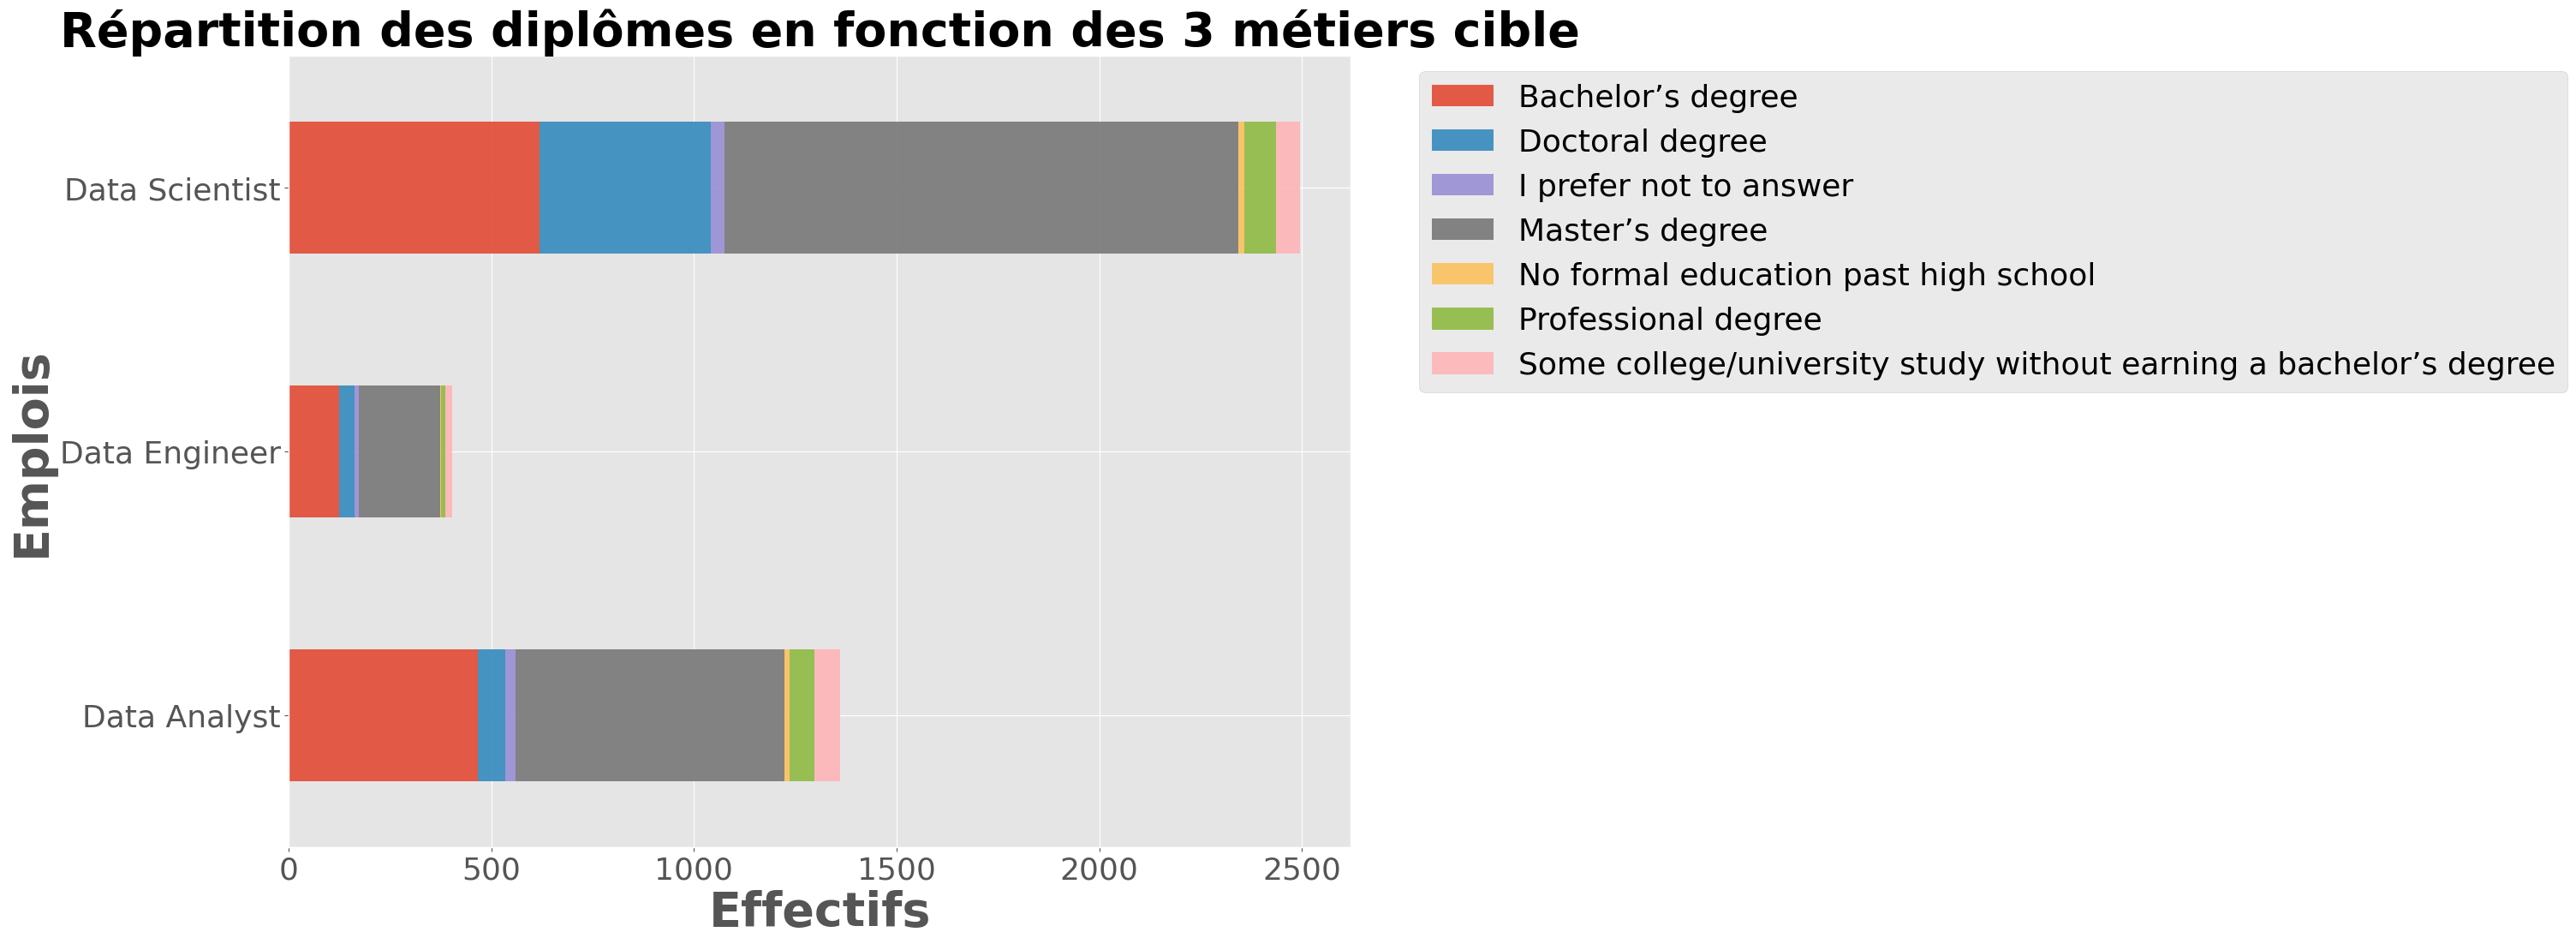

In [16]:
'''==> Focus sur 3 métiers de la data : Data Analyst, Data Engineer, Data Scientist :'''

#Répartition des diplômes en fonction des 3 métiers cible

top_diploma = df[df['position'].isin(['Data Analyst','Data Engineer', 'Data Scientist'])]
table = top_diploma.groupby(['diploma', 'position']).size().reset_index().pivot(columns='diploma', index='position', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(16,12),alpha=0.9)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
#Création des légendes
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 26})
        plt.xlabel('Effectifs',fontsize=40, weight = 'bold')
        plt.ylabel('Emplois',fontsize=40, weight = 'bold')
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.title('Répartition des diplômes en fonction des 3 métiers cible',fontsize=40,weight='bold');



On constate ici, une forte représentation des diplômes suivants : **Licence**, **Master** et **Doctorat** pour ces 3 métiers de la Data.

La voie royale semble être ici le **Master** qui est **le diplôme le plus représenté** quelque soit le métier. 

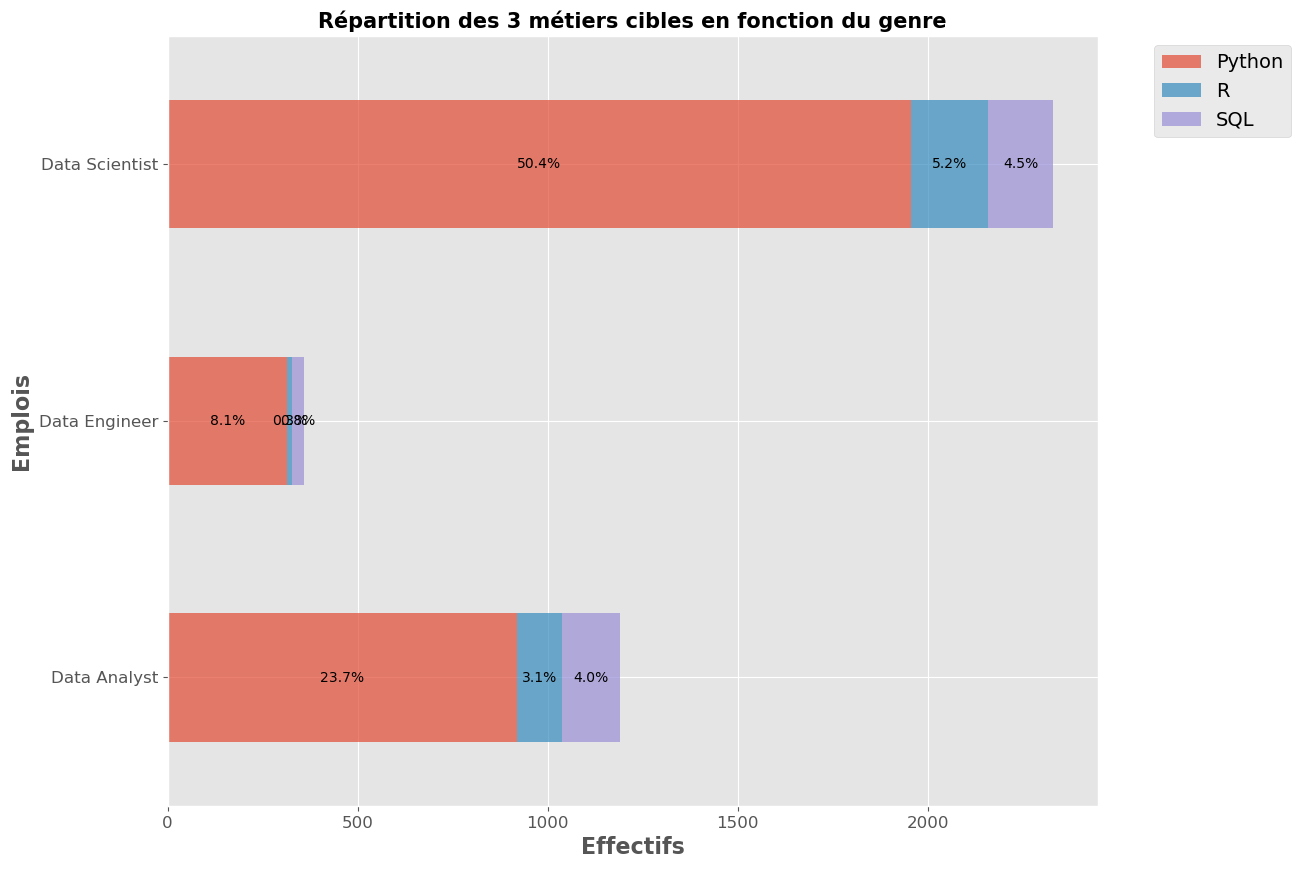

In [17]:
#Répartition des 3 langages de programmation en fonction des 3 métiers cible

pl_df = df[df['recommend_programming_to_learn_first'].isin(['Python','R', 'SQL'])]
pl_df_position = pl_df[pl_df['position'].isin(['Data Analyst','Data Engineer', 'Data Scientist'])]
table = pl_df_position.groupby(['recommend_programming_to_learn_first','position']).size().reset_index().pivot(columns='recommend_programming_to_learn_first', index='position', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                     ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=10)

#Création des légendes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Effectifs',fontsize=16, weight = 'bold')
plt.ylabel('Emplois',fontsize=16, weight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Répartition des 3 métiers cibles en fonction du genre',fontsize=15,weight='bold');

On vérifie ici, la prédominance du langage de programmation **Python** au sein de nos métiers cibles.

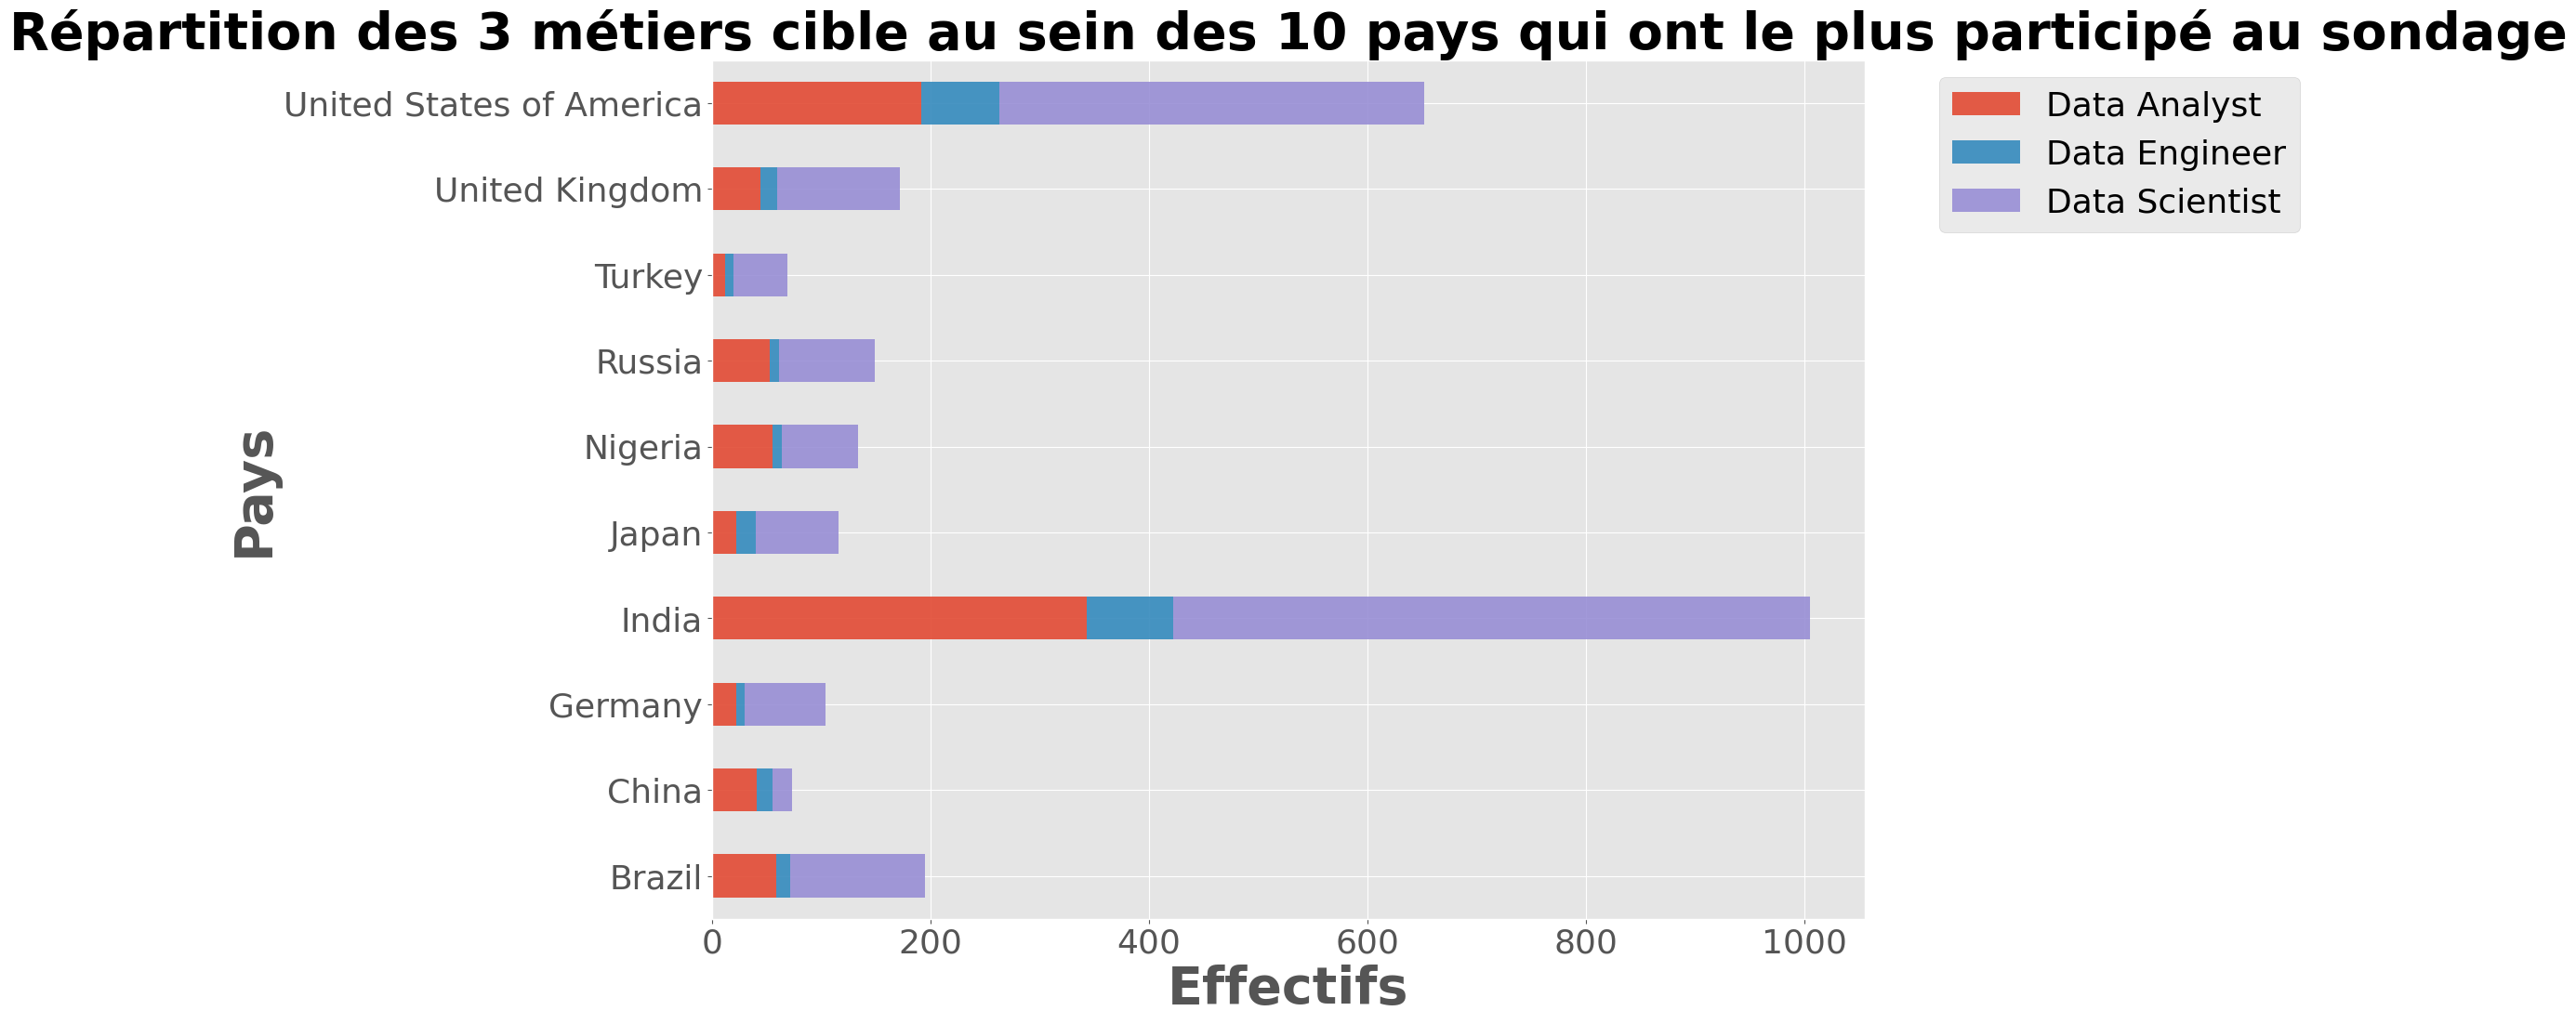

In [18]:
#Répartition des 3 métiers cible vs top 10 pays

top_country = df[df['country'].isin(['India','United States of America','Brazil','Japan','Russia', 
                              'United Kingdom', 'Nigeria', 'China','Germany', 'Turkey'])]
top_position_country = top_country[top_country['position'].isin(['Data Analyst','Data Engineer', 'Data Scientist'])]
table = top_position_country.groupby(['position', 'country']).size().reset_index().pivot(columns='position', index='country', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(16,12),alpha=0.9)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
#Création des légendes
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 26})
        plt.xlabel('Effectifs',fontsize=40, weight = 'bold')
        plt.ylabel('Pays',fontsize=40, weight = 'bold')
        plt.xticks(fontsize=26)
        plt.yticks(fontsize=26)
        plt.title('Répartition des 3 métiers cible au sein des 10 pays qui ont le plus participé au sondage',fontsize=40,weight='bold');



On constate ici, une très forte représentation des Data Scientist parmi les répondants au sondage.

**Cette représentation graphique est en adéquation avec le fait que le métier de Data Scientist fait partie des Tops métiers de l'informatique depuis ces 5 dernierès années.** 

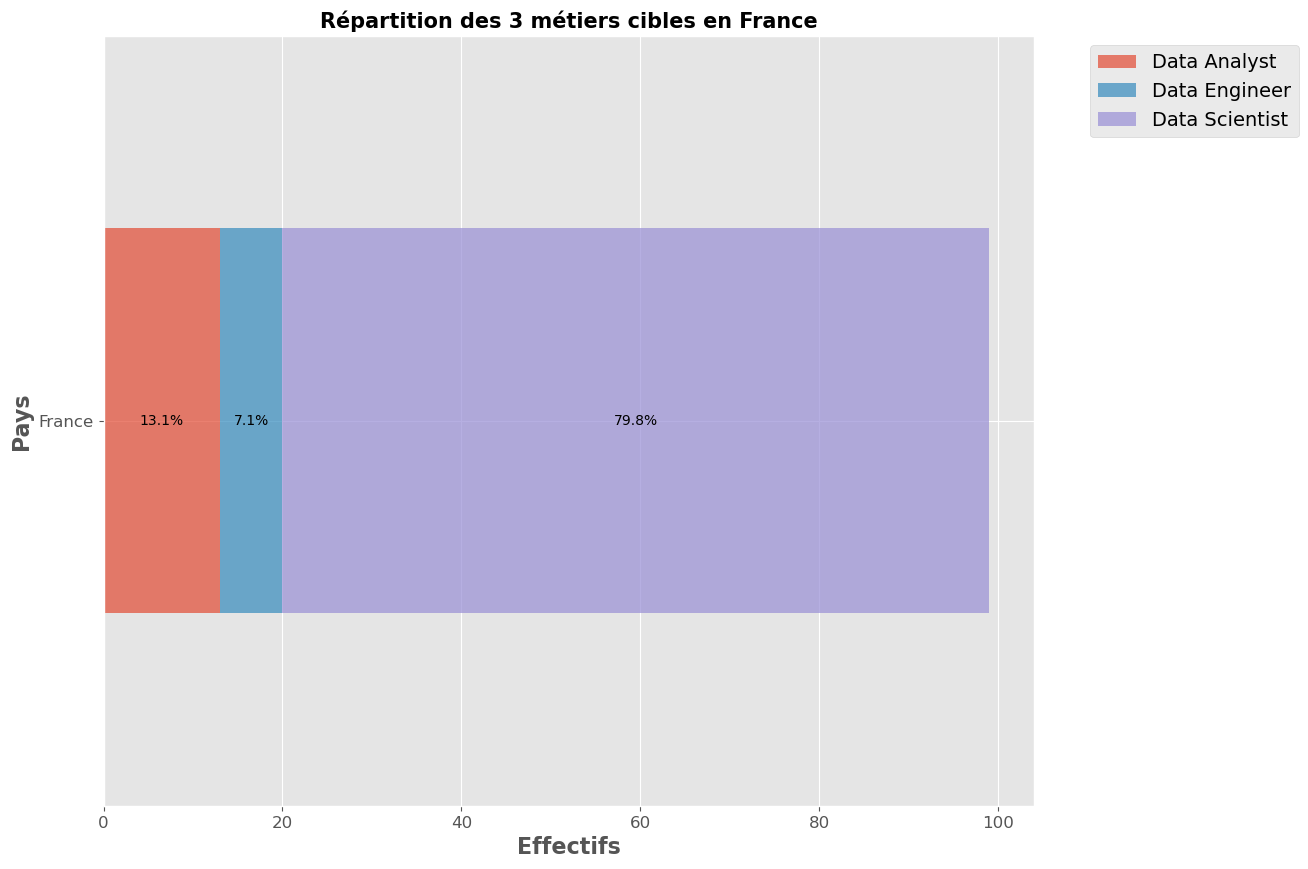

In [19]:
#Répartition des 3 métiers cible en France

only_france = df[df['country'].isin(['France'])]
top_position_france = only_france[only_france['position'].isin(['Data Analyst','Data Engineer', 'Data Scientist'])]
table = top_position_france.groupby(['position', 'country']).size().reset_index().pivot(columns='position', index='country', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                     ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=10)

#Création des légendes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Effectifs',fontsize=16, weight = 'bold')
plt.ylabel('Pays',fontsize=16, weight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Répartition des 3 métiers cibles en France',fontsize=15,weight='bold');



Nous avons ici accès notre analyse sur le territoire français. On constate également une **sur-représentation** des Data Scientist. 

Les Data Scientists représentent **80%** des répondants parmi nos 3 métiers cible.

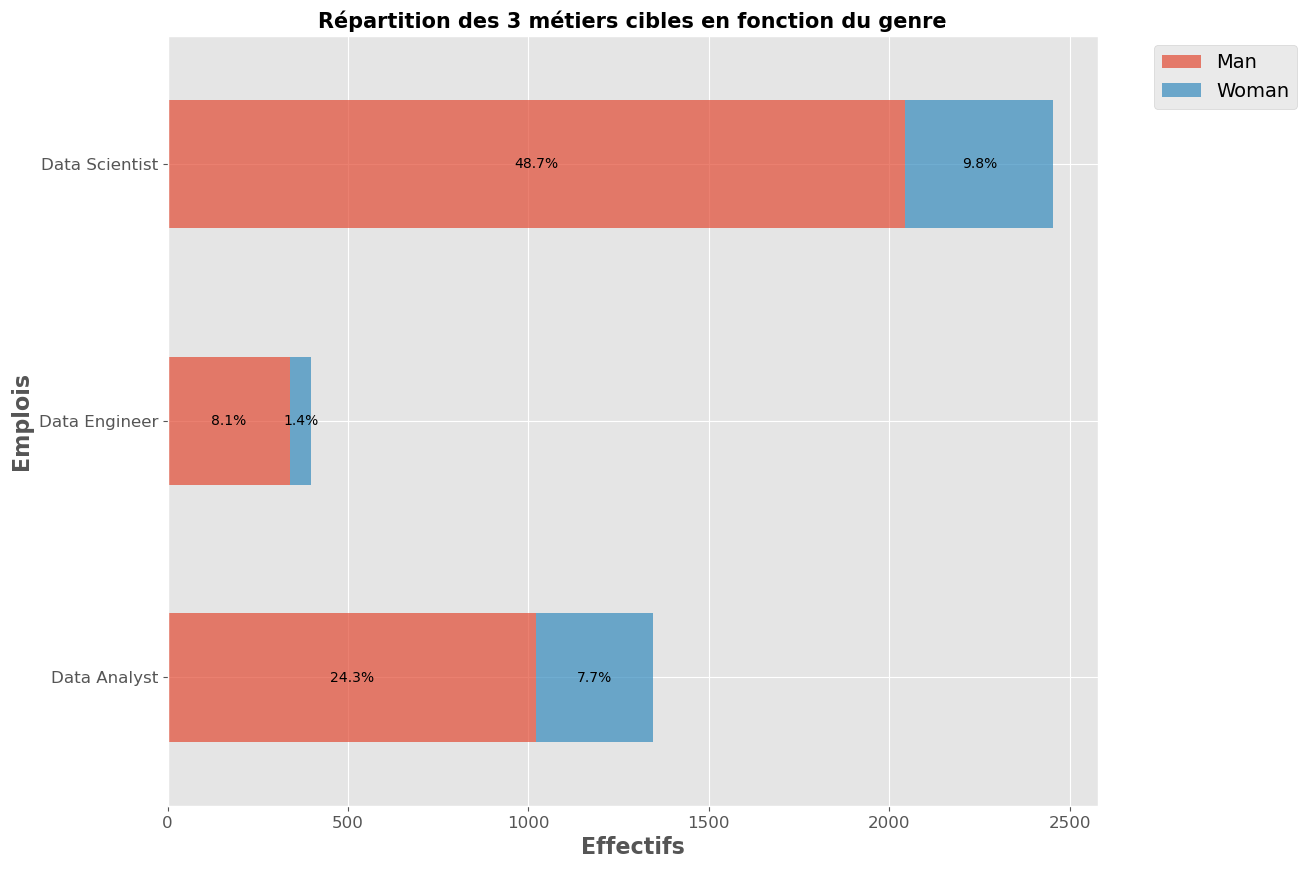

In [20]:
#Répartition des 3 métiers cible en fonction du genre 

gender_df = df[df['gender'].isin(['Man','Woman'])]
gender_df_position = gender_df[gender_df['position'].isin(['Data Analyst','Data Engineer', 'Data Scientist'])]
table = gender_df_position.groupby(['position', 'gender']).size().reset_index().pivot(columns='gender', index='position', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                     ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=10)

#Création des légendes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Effectifs',fontsize=16, weight = 'bold')
plt.ylabel('Emplois',fontsize=16, weight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Répartition des 3 métiers cibles en fonction du genre',fontsize=15,weight='bold');

Nous avons ici, analysés la répartition des femmes et des hommes au sein de nos 3 métiers cible pour l'ensemble des participants au sondage.

On constate là encore une représentation majoritaire des hommes par rapport aux femmes. Qui s'explique par le fait que **80%** des répondants sont des hommes.

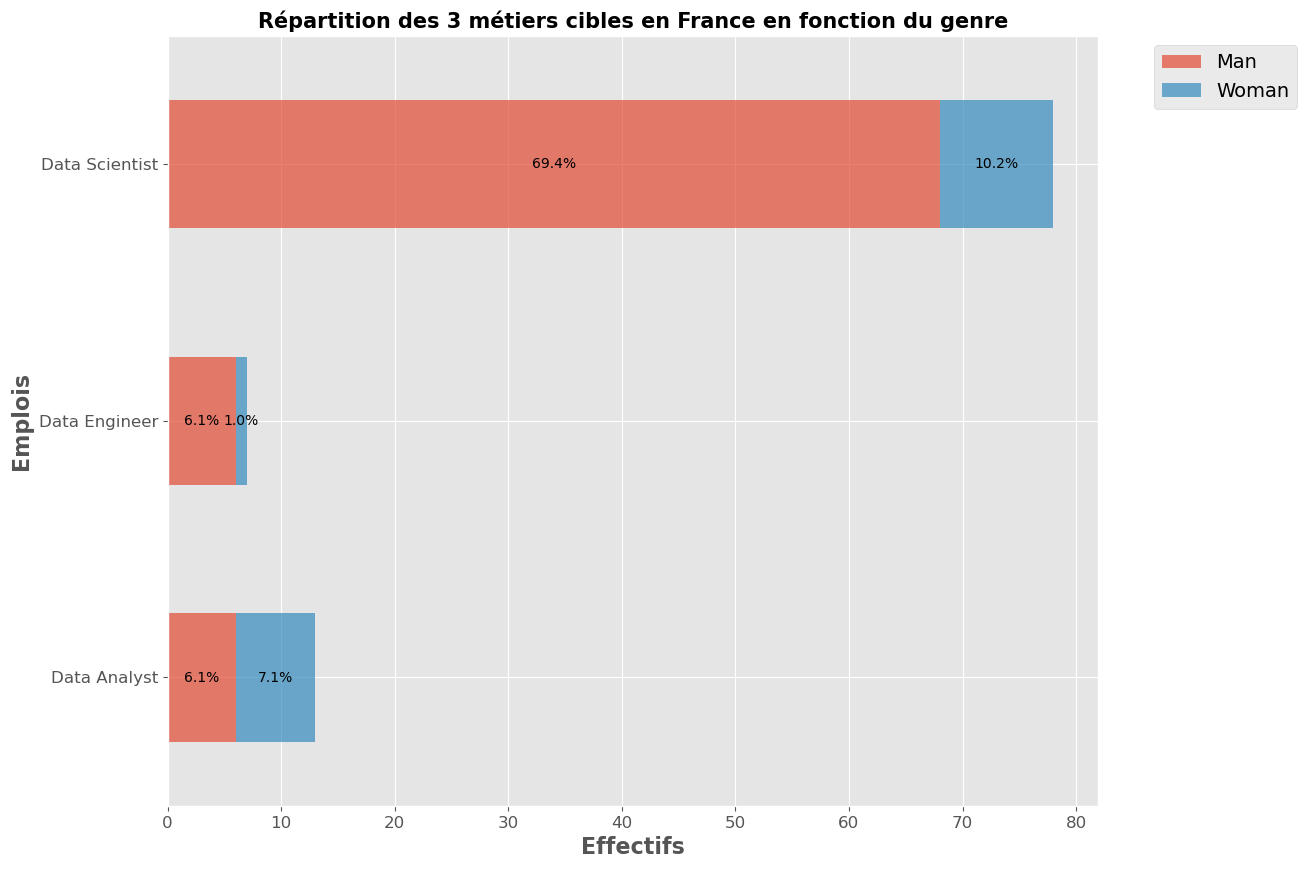

In [21]:
#Répartition des 3 métiers cible en France en fonction du genre 

gender_df = df[df['gender'].isin(['Man','Woman'])]
gender_df_france = gender_df[gender_df['country'].isin(['France'])]
gender_df_position = gender_df_france[gender_df_france['position'].isin(['Data Analyst','Data Engineer', 'Data Scientist'])]
table = gender_df_position.groupby(['position', 'gender']).size().reset_index().pivot(columns='gender', index='position', values=0)
plt.style.use('ggplot')
    
ax=table.plot(stacked=True,kind='barh',figsize=(12,10),alpha=0.7)

index_list = table.index.values
total = table.values.sum()

#Boucle de création des annotations
for i in table.index :
    tot_x = 0
    for j in table.columns:
        
        ratio = (table.loc[(i)][j])/ total
        x_pos = table.loc[(i)][j]+ tot_x
        tot_x += table.loc[(i)][j]
        if(ratio >= 0.001):
            plt.text(x = x_pos - table.loc[(i)][j]/2, y = np.where(index_list == i)[0][0]
                     ,s= '%.1f'%(ratio*100)+'%' ,va='center', ha='center', size=10)

#Création des légendes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',prop={'size': 14})
plt.xlabel('Effectifs',fontsize=16, weight = 'bold')
plt.ylabel('Emplois',fontsize=16, weight = 'bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Répartition des 3 métiers cibles en France en fonction du genre',fontsize=15,weight='bold');

Nous avons ici, analysés la répartition des femmes et des hommes au sein de nos métiers cibles mais cette fois-ci en France. 

On constate que les Data Scientists et les Data Engineer sont majoritairement masculin. **MAIS, un peu plus de la moitié des Data Analysts en France sont des femmes.**

# Conclusion

### Cette première analyse statistique nous a permis de mettre en évidence les points suivants :

* **80%** des répondants sont des **hommes**, ce qui est en adéquation avec le fait que les personnes qui travaillent dans le secteur de la tech sont majoritairement des hommes.


* La grande majorité des répondants à entre 18 et 40 ans, ce qui laisse supposer que le secteur de la Data est ouvert aux profils Junior et confirmé. 


* 3 Langages de progammation se dégagent dans le secteur de la Data : **Python**, **R** et **SQL**. Ceux sont les langages à privilégier par ceux qui souhaitent travailler dans les métiers de la Data.


* Une part importante des répondants étaient étudiants au moment du sondage, cette représentation importante des étudiants peut s'expliquer par la vocation pédagogique et de formation de la plateforme Kaggle. 


* **L'Inde** et **les Etats Unis d'Amérique** se dégagent nettement en termes de nombre de participants au sondage, nous ne disposons néanmoins, d'aucune information pour expliquer cette sur-représentation de ces deux pays dans le sondage.


* 3 Diplômes sont sur-représentés dans les métiers de la Data. Si au premier abord, on pouvait avoir l'impression qu'un niveau **Licence** est à minima nécessaire pour travailler dans les métiers de la Data. Nous avons constaté que pour nos 3 métiers cible (Data Analyst, Data Engineer et Data Scientist), c'est le Master qui semble à minima nécessaire pour accéder à l'un de ces 3 métiers.


* Nous avons pu vérifier que le langage de programmation le plus utilisé au sein de nos 3 métiers cible est **Python**


* Sans surprise, sur l'ensemble des répondants la répartition des hommes et des femmes sur nos 3 métiers cible est de 80/20. Exception faite des Data Analysts français qui sont pour un peu plus de la moitié des femmes.

### Pour aller plus loin : 

Nous avons décidé de focaliser notre analyse statistique sur deux critères principaux : 

    * Le niveau d'étude. 
    
    * Les langages de programmation.
    
Nous espérions ainsi, vérifier que ces critères seraient suffisants pour l'entraînement d'un modèle de machine learning afin d'être en mesure de prédire vers quel métier peut s'orienter un apprenant en fonction de son niveau d'étude et de ses compétences dans un langage de programmation.

Force de constater, que le langage de programmation **Python** et **le Master** sont sur-représentés au sein de nos 3 métiers cible. 

**Il nous sera donc nécessaire de trouver des critères supplémentaires pour permettre à notre futur modèle de machine learning d'être en mesure de prédire l'un des 3 métiers cible à nos apprenants.**